In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
dw = pd.read_csv(r'~\data_warehouse.csv')
dw.head()

,member_number,membership_type,Years,Number_Family,Number_Children,Pool,Golf,Tennis,Dining,Other,PromoOne,PromoTwo,Private_Function,July_Fourth,Thanksgiving,Easter_Brunch
0,102365,Family,13,3,1,3271.0,0.0,0.0,3312.05,2152.46,0,1,0,1,1,0
1,105078,Family,17,2,0,3343.0,0.0,0.0,4728.73,0.00,1,0,0,0,1,0
2,106225,Family,24,6,5,0.0,0.0,0.0,1239.06,0.00,0,0,1,1,0,0
3,109320,Individual,27,1,0,0.0,0.0,0.0,5424.58,0.00,1,0,0,0,0,1
4,112823,Family,9,4,2,6088.0,0.0,0.0,1421.67,4661.68,0,1,0,0,1,0


In [10]:
ready2 = dw.drop('member_number', axis = 1)
ready = pd.get_dummies(ready2)

In [11]:
ready.head()

,Years,Number_Family,Number_Children,Pool,Golf,Tennis,Dining,Other,PromoOne,PromoTwo,Private_Function,July_Fourth,Thanksgiving,Easter_Brunch,membership_type_Couple,membership_type_Family,membership_type_Individual,membership_type_Retiree
0,13,3,1,3271.0,0.0,0.0,3312.05,2152.46,0,1,0,1,1,0,0,1,0,0
1,17,2,0,3343.0,0.0,0.0,4728.73,0.00,1,0,0,0,1,0,0,1,0,0
2,24,6,5,0.0,0.0,0.0,1239.06,0.00,0,0,1,1,0,0,0,1,0,0
3,27,1,0,0.0,0.0,0.0,5424.58,0.00,1,0,0,0,0,1,0,0,1,0
4,9,4,2,6088.0,0.0,0.0,1421.67,4661.68,0,1,0,0,1,0,0,1,0,0


## K-means

Text(0.5,1,'Inertia of k-Means versus number of clusters')

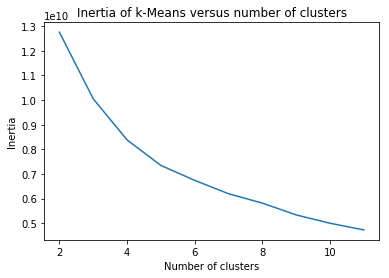

In [15]:
scores = [KMeans(n_clusters=i+2).fit(ready).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

## K-means Clustering - Cosine distance

Text(0.5,1,'Inertia of Cosine k-Means versus number of clusters')

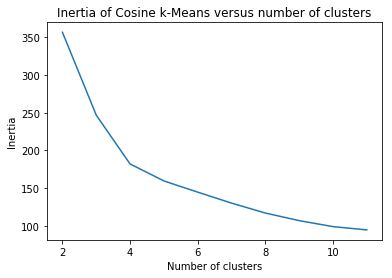

In [12]:
normalized_vectors = preprocessing.normalize(ready)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

## DBSCAN - Density-Based Spatial Clustering of Applications with Noise

## Evaluating Clusters

The Silhouette score measures the separability between clusters based on the distances between and within clusters. It calculates the mean intra-cluster distance (a), which is the mean distance within a cluster, and the mean nearest-cluster distance (b), which is the distance between a sample and the nearest cluster it is not a part of, for each sample. Then, the Silhouette coefficient for a sample is (b - a) / max(a, b).

In [24]:
# Prepare models
kmeans = KMeans(n_clusters=4).fit(ready)
normalized_vectors = preprocessing.normalize(ready)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)

# dbscan = DBSCAN(eps=3.5, min_samples=17).fit(ready)

# Print results
# Print results
print('kmeans: {}'.format(silhouette_score(ready, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
#print('DBSCAN: {}'.format(silhouette_score(ready, dbscan.labels_, 
#                                           metric='cosine')))

kmeans: 0.25077566488023484
Cosine kmeans:0.5512982260531342


The cosine-based k-Means outperforms k-Means due to the amount of feature (18) that we have in the data.

## Visualizing Clusters

### Principal Component Analysis (PCA)

In [30]:
# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

%matplotlib inline 

In [31]:
def plot_tsne(tnse_data, kmeans_labels):
    df_tsne = pd.DataFrame(tsne_data).rename({0: 'x', 1: 'y'}, axis=1)
    df_tsne['z'] = kmeans_labels
    sns.scatterplot(x=df_tsne.x, y=df_tsne.y, hue=df_tsne.z, palette="Set2")
    plt.show()
    
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def prepare_tsne(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = TSNE(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix


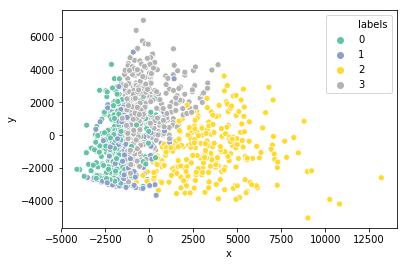

In [32]:
pca_df = prepare_pca(2, ready, normalized_kmeans.labels_)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, 
                palette="Set2")

In [51]:
tsne_df = prepare_tsne(2, ready, normalized_kmeans.labels_)
# plot_tsne(tsne_df, normalized_kmeans.labels_)

## Interpreting Clusters

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(ready))
df_scaled.columns = ready.columns
df_scaled['normalized_kmeans'] = normalized_kmeans.labels_

C:\Users\siyue\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [42]:
df = ready.copy()

C:\Users\siyue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


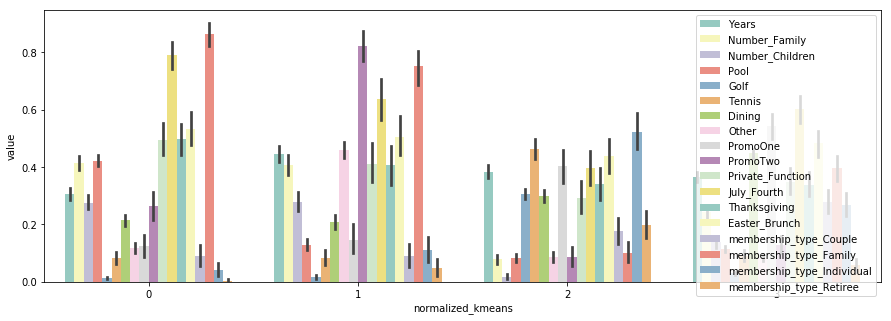

In [50]:
# df = load_preprocess_data()
df['normalized_kmeans'] = normalized_kmeans.labels_
tidy = df_scaled.melt(id_vars='normalized_kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='normalized_kmeans', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
# plt.savefig("mess.jpg", dpi=300)
# plt.savefig("dbscan_mess.jpg", dpi=300)

The problem with this approach is that we simply have too many variables. Not all of them are likely to be important when creating the clusters. Instead, I will select the most important columns based on the following approac

### Variance

What I essentially do is group datapoints by cluster and take the average. Then, I calculate the standard deviation between those values for each variable. Variables with a high standard deviation indicate that there are large differences between clusters and that the variable might be important.

In [44]:
df_mean = df_scaled.loc[df_scaled.normalized_kmeans!=-1, :].groupby('normalized_kmeans').mean().reset_index()
df_mean

,normalized_kmeans,Years,Number_Family,Number_Children,Pool,Golf,Tennis,Dining,Other,PromoOne,PromoTwo,Private_Function,July_Fourth,Thanksgiving,Easter_Brunch,membership_type_Couple,membership_type_Family,membership_type_Individual,membership_type_Retiree
0,0,0.304714,0.412839,0.276207,0.422280,0.013888,0.083792,0.215505,0.119185,0.123675,0.265018,0.494700,0.791519,0.498233,0.533569,0.091873,0.862191,0.042403,0.003534
1,1,0.444345,0.407895,0.279825,0.129486,0.018111,0.082371,0.208536,0.458963,0.147368,0.821053,0.410526,0.636842,0.405263,0.505263,0.089474,0.752632,0.110526,0.047368
2,2,0.383299,0.078321,0.018170,0.083039,0.307113,0.463287,0.299742,0.085187,0.402256,0.086466,0.293233,0.394737,0.342105,0.439850,0.176692,0.101504,0.522556,0.199248
3,3,0.364962,0.242199,0.137234,0.114840,0.029738,0.091828,0.447225,0.084780,0.542553,0.127660,0.348936,0.602128,0.338298,0.482979,0.278723,0.395745,0.268085,0.057447


C:\Users\siyue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


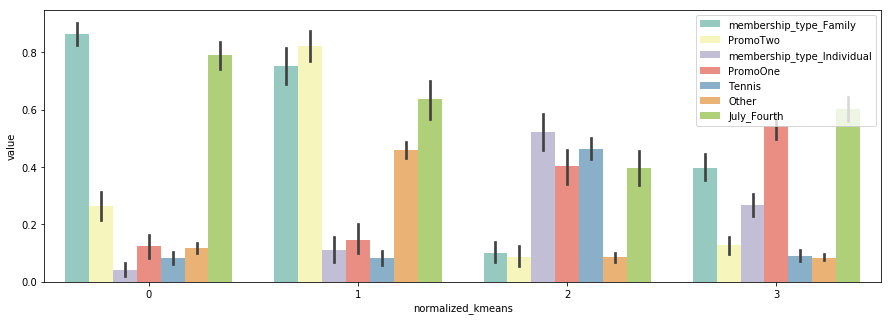

In [45]:
# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster
df_mean = df_scaled.loc[df_scaled.normalized_kmeans!=-1, :].groupby('normalized_kmeans').mean().reset_index()
results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(7).Variable.values) + ['normalized_kmeans']

# Plot data
tidy = df_scaled[selected_columns].melt(id_vars='normalized_kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='normalized_kmeans', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
# plt.savefig("dbscan_results.jpg", dpi=300)

### Feature Importance

In [46]:
from sklearn.ensemble import RandomForestClassifier
y = df.iloc[:,-1]
X = df.iloc[:,:-1]
clf = RandomForestClassifier(n_estimators=100).fit(X, y)
selected_columns = list(pd.DataFrame(np.array([clf.feature_importances_, X.columns]).T, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7)
           .Feature
           .values)

C:\Users\siyue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


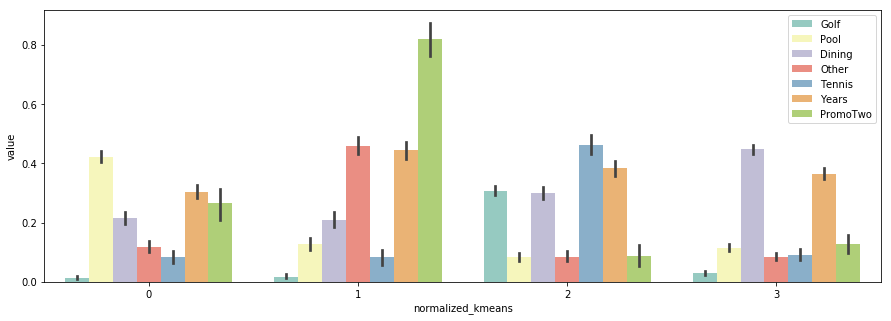

In [48]:
# Plot data
tidy = df_scaled[selected_columns+['normalized_kmeans']].melt(id_vars='normalized_kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='normalized_kmeans', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
# plt.savefig('randomforest.jpg', dpi=300)

We can see that similar features are selected when comparing to the variance analysis that we did before. Since this method requires a bit more work in the form of validation I would suggest using the variance method described before.

## Conclusion

1. Families are more likely to attend July forth special function and promotion 
2. Families tend to spend less on tennis. The reason might be the advertisement of tennis is not attractive to families. The company can come up with some promo campaign targeting with families.
3. Individuals are more likely to attend promotion 1.